In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import copy
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

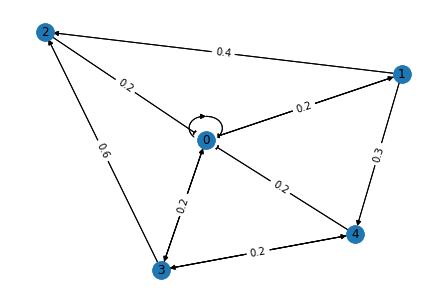

In [2]:
# https://stackoverflow.com/questions/56597840/drawing-weighted-graph-from-adjacency-matrix-with-edge-labels
# Directed weighted graph from weighted Adjacency Matric (matrix C in J. Lizier paper)

A = [
    [0.2, 1,  0,  .8, 0],
    [0.2, 0,  .4, 0,  .3],
    [0.2, 0,  0,  0,  0],
    [0.2, 0,  .6, 0,  .7],
    [0.2, 0,  0,  .2, 0]]

G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
layout = nx.kamada_kawai_layout(G)
nx.draw(G, layout)
nx.draw_networkx(G, pos=layout)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

In [115]:



if (0,88) in G.edges():
    print('edge found')
    
G.add_weighted_edges_from([(1,4,0.5)])

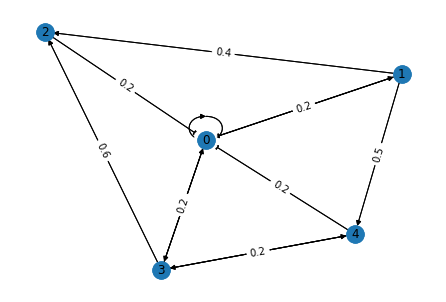

In [116]:
nx.draw(G, layout)
nx.draw_networkx(G, pos=layout)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

In [68]:
def rebalance_incoming_edges_for_node(G, node: int):
    '''G directed graph
       node node to rebalance incoming weight so that incoming weight '''
    pass

def TReconnectIncomingEdgeToOtherNode(g_orig, inPlace=True):
    
    "MCMC transformation that preserves number of edges and nodes, and outgoing degree distribution, but not incoming degree distribution"
    "Applicable for directed networks"
    "This transfromation also preserve the sum of outgoing weights from a node, but not incoming ==> does NOT preserver (1,1,1,1..) eigenvector"
    
    if inPlace == False:
        g=copy.deepcopy(g_orig)
    else:
        g=g_orig

    '''Reconnect incoming edge'''
    N=g.number_of_nodes()
    L=g.number_of_edges()

    #Select a random edge to reconnect
    edge_to_reconnect = random.choice(list(g.edges(data=True)))
    print(f'edge to reconnect:{edge_to_reconnect}')

    #Select another random node to connect that edge to
    node2 = [node for node in g.nodes() if node != edge_to_reconnect[1]][np.random.randint(0,N-1)]
    print(f'dest node selected {node2}')
    
    new_weight = edge_to_reconnect[2]['weight']
    if (edge_to_reconnect[0], node2) in g.edges:
        new_weight += g.get_edge_data(edge_to_reconnect[0], node2)['weight']
    g.add_weighted_edges_from([(edge_to_reconnect[0], node2, new_weight)])
    print(f'new edge: {(edge_to_reconnect[0], node2, new_weight)}')
    g.remove_edge(edge_to_reconnect[0], edge_to_reconnect[1])
    print(f"removed edge: {edge_to_reconnect}, {edge_to_reconnect[2]['weight']}")

    #nodes to rebalance : node2 (added incoming edge), edge_to_reconnect[1] (removed incoming edge)
    # is the rebalance a symmetric operation
    rebalance_incoming_edges_for_node(g, node2)
    rebalance_incoming_edges_for_node(g, edge_to_reconnect[1])
    return(g)

def TReconnectOutgoingEdgeToOtherNode(g_orig, inPlace=True):
    
    "MCMC transformation that preserves number of edges and nodes, and NOT outgoing degree distribution, but incoming degree distribution"
    "Applicable for directed networks"
    "This transfromation also preserve the sum of incoming weights from a node, therefore will preserve eigenvector (1,1,1,...1) if there is one"
    
    if inPlace == False:
        g=copy.deepcopy(g_orig)
    else:
        g=g_orig

    '''Reconnect incoming edge'''
    N=g.number_of_nodes()
    L=g.number_of_edges()

    #Select a random edge to reconnect
    edge_to_reconnect = random.choice(list(g.edges(data=True)))
    print(f'edge to reconnect:{edge_to_reconnect}')

    #Select another random node to serve as the origin of that edge
    node2 = [node for node in g.nodes() if node != edge_to_reconnect[0]][np.random.randint(0,N-1)]
    print(f'origin node selected {node2}')
    
    new_weight = edge_to_reconnect[2]['weight']
    if (node2, edge_to_reconnect[1]) in g.edges:
        new_weight += g.get_edge_data(node2, edge_to_reconnect[1])['weight']
    g.add_weighted_edges_from([(node2, edge_to_reconnect[1], new_weight)])
    print(f'new edge: {(node2, edge_to_reconnect[1], new_weight )}')
    g.remove_edge(edge_to_reconnect[0], edge_to_reconnect[1])
    print(f"removed edge: {edge_to_reconnect}, {edge_to_reconnect[2]['weight']}")

    return(g)

In [64]:
G.edges


TypeError: remove_edge() missing 1 required positional argument: 'v'

In [29]:
# https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkxb

def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=10,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items


In [36]:
# https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkxb

def drawCurvedEdgesGraph(G, ax=None):

    if ax==None:
        fig, ax = plt.subplots()

    layout = nx.kamada_kawai_layout(G)

    # Draw nodes and their labels

    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_nodes(G, pos=layout,ax=ax)
    nx.draw_networkx_labels(G, pos=layout, ax=ax)

    # Draw edges

    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    straight_edges = list(set(G.edges()) - set(curved_edges))
    nx.draw_networkx_edges(G, pos=layout, ax=ax, edgelist=straight_edges)
    arc_rad = 0.25
    nx.draw_networkx_edges(G, pos=layout, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')

    #nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels, connectionstyle='arc3, rad = 0.1')
    #nx.draw(G, pos=layout, with_labels=True, connectionstyle='arc3, rad = 0.1')

    # Drawing edges labels

    edge_weights = nx.get_edge_attributes(G,'weight')
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
    my_draw_networkx_edge_labels(G, pos=layout,  edge_labels=curved_edge_labels,rotate=False, rad = arc_rad)
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=straight_edge_labels,rotate=False)

    plt.show()

In [91]:
newG = TReconnectIncomingEdgeToOtherNode(newG, inPlace=False)

edge to reconnect:(3, 3, {'weight': 0.8})
dest node selected 4
new edge: (3, 4, 0.8)
removed edge: (3, 3, {'weight': 0.8}), 0.8


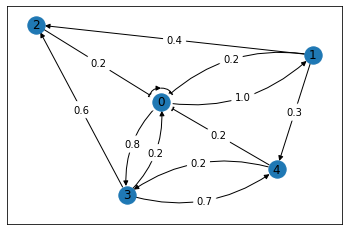

In [92]:
drawCurvedEdgesGraph(G)

In [95]:
np.linalg.eig(nx.to_numpy_matrix(G))

(array([ 1.        +0.j        , -0.41505515+0.40570697j,
        -0.41505515-0.40570697j,  0.12505839+0.j        ,
        -0.09494809+0.j        ]),
 matrix([[ 0.80095183+0.j        ,  0.79711317+0.j        ,
           0.79711317-0.j        ,  0.24867805+0.j        ,
          -0.2738073 +0.j        ],
         [ 0.29802859+0.j        , -0.24310928+0.08538176j,
          -0.24310928-0.08538176j,  0.43730396+0.j        ,
          -0.32228246+0.j        ],
         [ 0.16019037+0.j        , -0.19642413-0.19200012j,
          -0.19642413+0.19200012j,  0.39769911+0.j        ,
           0.5767516 +0.j        ],
         [ 0.4284161 +0.j        , -0.3089491 +0.29751577j,
          -0.3089491 -0.29751577j, -0.56992537+0.j        ,
           0.50380175+0.j        ],
         [ 0.24587359+0.j        , -0.04863066-0.1908974j ,
          -0.04863066+0.1908974j , -0.51375574+0.j        ,
          -0.48446359+0.j        ]]))

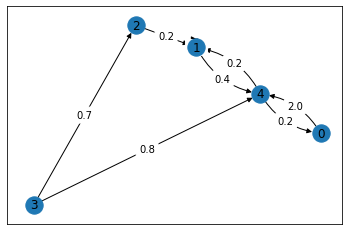

In [93]:
drawCurvedEdgesGraph(newG)

In [96]:
np.linalg.eig(nx.to_numpy_matrix(newG))

(array([ 0.        ,  0.        , -0.66763977,  0.38063791,  0.78700186]),
 matrix([[ 0.00000000e+000,  0.00000000e+000,  8.71805802e-001,
           7.90057678e-001, -7.56019322e-001],
         [ 0.00000000e+000,  0.00000000e+000,  9.96972250e-002,
          -5.03888477e-001, -4.14623527e-001],
         [ 0.00000000e+000,  7.15774414e-292, -2.98655742e-002,
          -2.64760005e-001, -1.05367865e-001],
         [ 1.00000000e+000, -1.00000000e+000,  3.80035467e-001,
          -1.70875364e-001, -3.96127337e-001],
         [ 0.00000000e+000,  0.00000000e+000, -2.91026112e-001,
           1.50362952e-001, -2.97494305e-001]]))

In [97]:
newG2 = TReconnectOutgoingEdgeToOtherNode(G, inPlace=False)

edge to reconnect:(1, 0, {'weight': 0.2})
origin node selected 3
new edge: (3, 0, 0.4)
removed edge: (1, 0, {'weight': 0.2}), 0.2


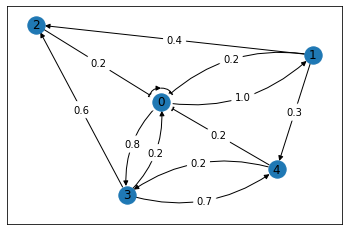

In [41]:
drawCurvedEdgesGraph(G)

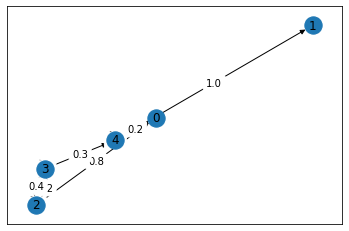

In [111]:
drawCurvedEdgesGraph(newG2)

In [110]:
np.linalg.eig(nx.to_numpy_matrix(newG2))

(array([1. , 0.4, 0.7, 0. , 0. ]),
 matrix([[ 0.        ,  0.        ,  0.        ,  0.46409548,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.53452248],
         [ 0.4472136 ,  0.70710678, -0.53452248, -0.76244258, -0.11454053],
         [ 0.89442719, -0.70710678, -0.26726124,  0.4309458 ,  0.3436216 ],
         [ 0.        ,  0.        ,  0.80178373, -0.13259871, -0.76360355]]))

In [109]:
newG2 = TReconnectOutgoingEdgeToOtherNode(newG2, inPlace=False)

edge to reconnect:(0, 4, {'weight': 0.3})
origin node selected 3
new edge: (3, 4, 0.3)
removed edge: (0, 4, {'weight': 0.3}), 0.3
